# Shopping Trends

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as linregress
import numpy as np

# Study data files
shopping_trends_path = "shopping_trends_updated.csv"

# Read the data
shopping_trends_data = pd.read_csv(shopping_trends_path)

# Display the data table for preview
shopping_trends_data = shopping_trends_data.set_index('Customer ID')
shopping_trends_data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [49]:
# Add Age Groups
bins = [18, 31, 46, 61, shopping_trends_data['Age'].max()]
labels = ['18-30', '31-45', '46-60', '61+']

shopping_trends_data['Age Group'] = pd.cut(shopping_trends_data['Age'], bins=bins, labels=labels, right=False)
shopping_trends_data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,46-60
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,18-30
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,46-60
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-30
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,31-45


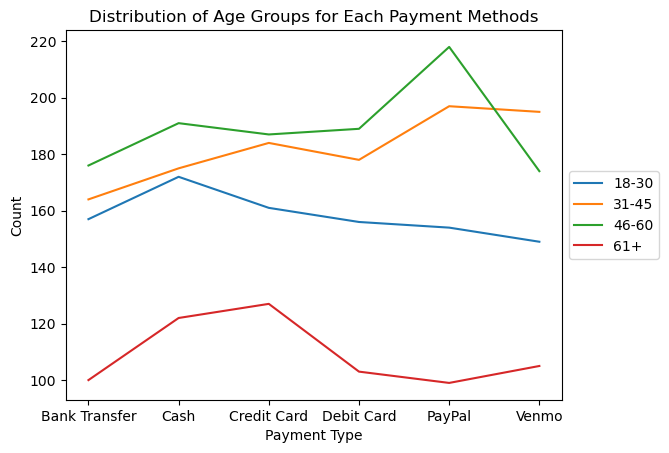

In [54]:
#Compare Age to Payment Method
age_vs_payment = shopping_trends_data.groupby('Payment Method')['Age Group'].count()
pivot_table = shopping_trends_data.pivot_table(index='Payment Method', columns='Age Group', aggfunc='size', fill_value=0)
pivot_table.plot(kind='line', stacked=False)
plt.title('Distribution of Age Groups for Each Payment Methods')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

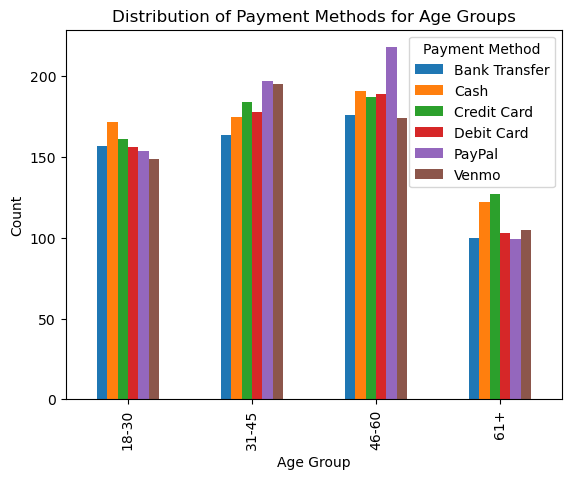

In [69]:
#Age Group as x-axis
age_vs_payment = shopping_trends_data.groupby('Age Group')['Payment Method'].count()
pivot_table = shopping_trends_data.pivot_table(index='Age Group', columns='Payment Method', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=False)
plt.title('Distribution of Payment Methods for Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

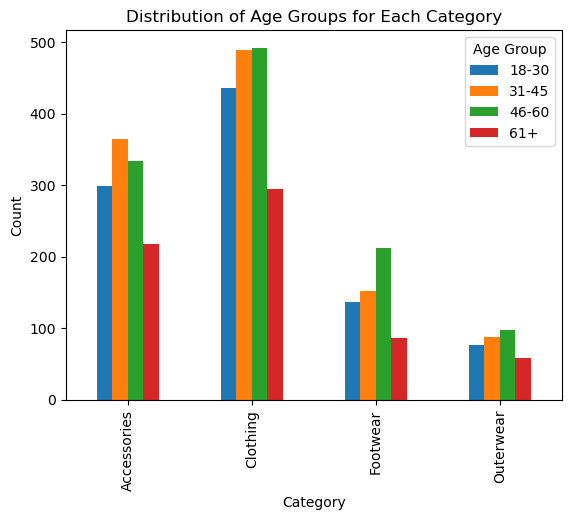

In [57]:
#Compare Age and Category
age_vs_categories = shopping_trends_data.groupby('Category')['Age Group'].count()
pivot_table = shopping_trends_data.pivot_table(index='Category', columns='Age Group', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=False)
plt.title('Distribution of Age Groups for Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Promo Code Used   No  Yes
Season                   
Fall             578  397
Spring           559  440
Summer           532  423
Winter           554  417


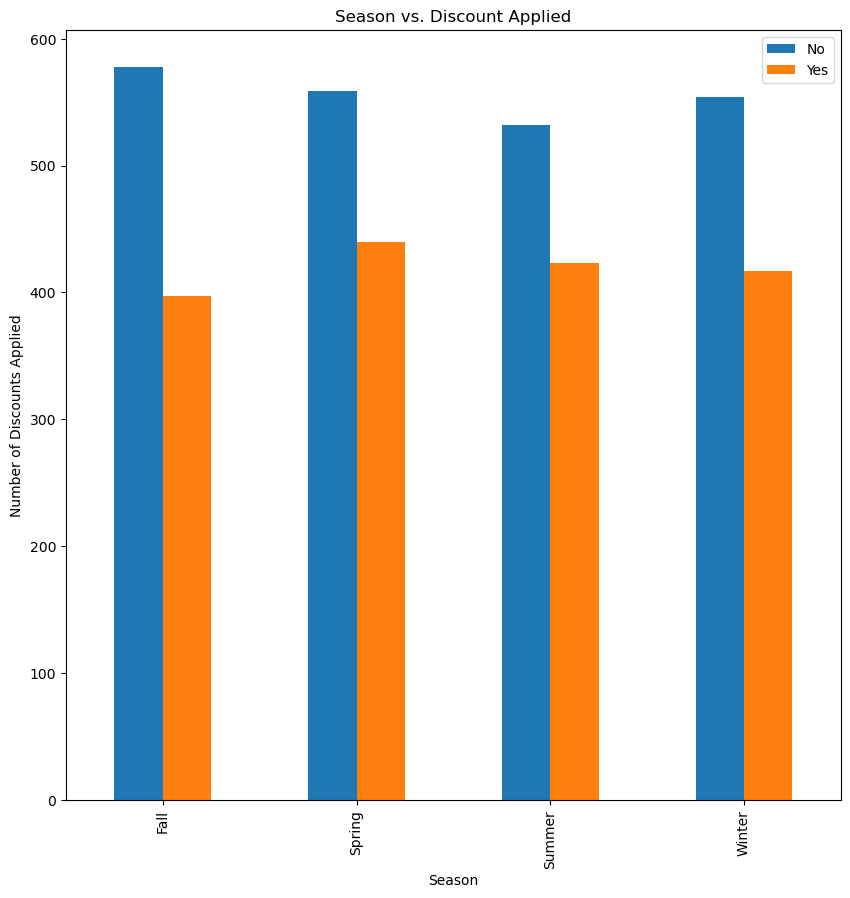

In [61]:
#Compare Season and Discounts Applied
season_vs_discount = shopping_trends_data.groupby(['Season', 'Promo Code Used']).size().unstack(fill_value=0)
print(season_vs_discount)
#Create Line Graph
season_vs_discount.plot(kind='bar', figsize=(10,10))
plt.title('Season vs. Discount Applied')
plt.xlabel('Season')
plt.ylabel('Number of Discounts Applied')
plt.legend(loc='best')
plt.show()

Promo Code Used          No  Yes
Frequency of Purchases          
Annually                334  238
Bi-Weekly               321  226
Every 3 Months          326  258
Fortnightly             299  243
Monthly                 316  237
Quarterly               322  241
Weekly                  305  234


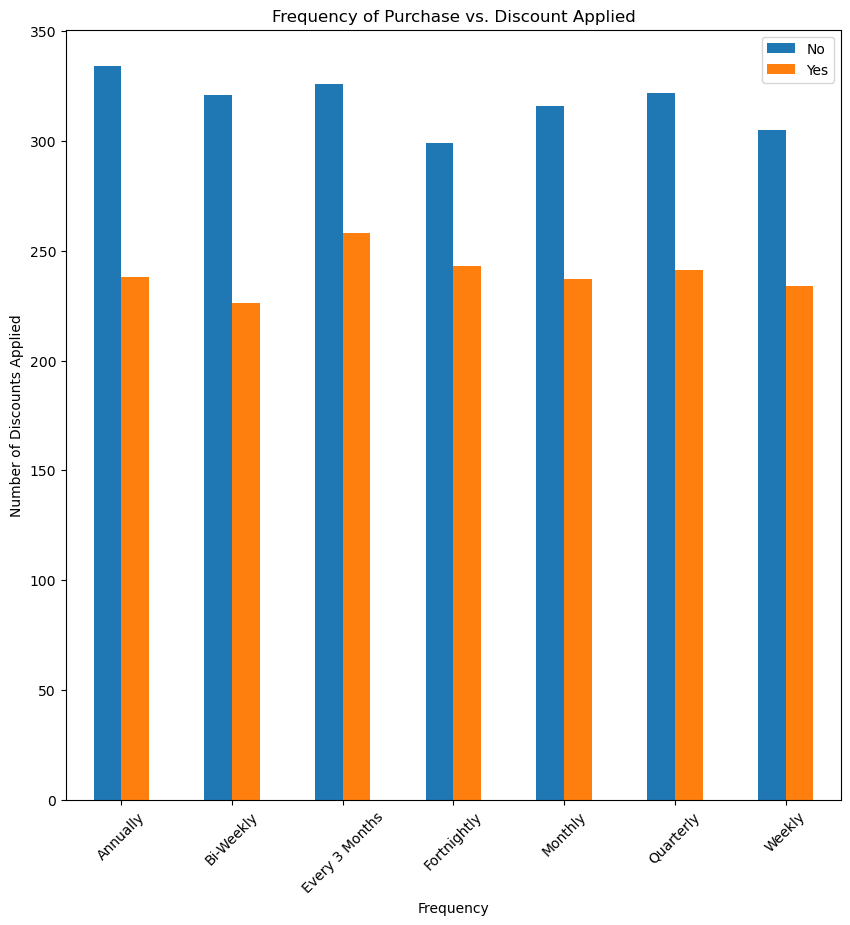

In [59]:
#Compare Frequency of Purchases on Discounts
frequency_vs_discount = shopping_trends_data.groupby(['Frequency of Purchases', 'Promo Code Used']).size().unstack(fill_value=0)
print(frequency_vs_discount)
#Create Bar Chart
frequency_vs_discount.plot(kind='bar', figsize=(10,10))
plt.title('Frequency of Purchase vs. Discount Applied')
plt.xlabel('Frequency')
plt.xticks(rotation=45)
plt.ylabel('Number of Discounts Applied')
plt.legend(loc='best')
plt.show()

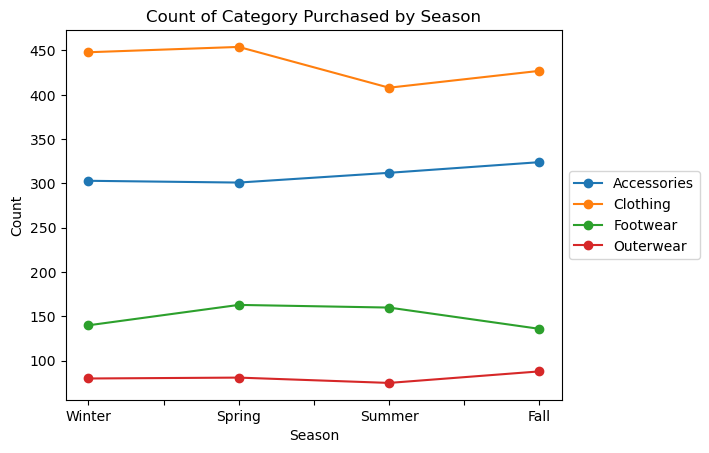

In [62]:
#Compare Season and Category
season_vs_category = shopping_trends_data.groupby(['Season', 'Category']).size().reset_index(name='Count')
season_category_pivot = season_vs_category.pivot(index='Season', columns='Category', values='Count')

season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_category_pivot = season_category_pivot.loc[season_order]

#Plot the data
season_category_pivot.plot(kind='line', marker='o')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count of Category Purchased by Season')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#print(season_vs_category)
#  	       --> Item Purchased

In [47]:
#Age vs Rating Summary Table
age_vs_rating_summary = shopping_trends_data.groupby('Age Group')['Review Rating'].agg(['mean', 'median', 'std']).reset_index()
age_vs_rating_summary.columns = ['Age Group', 'Mean Rating', 'Median Rating', 'Standard Deviation']
print(age_vs_rating_summary)

  Age Group  Mean Rating  Median Rating  Standard Deviation
0     18-30     3.793994            3.8            0.718205
1     31-45     3.737054            3.8            0.711374
2     46-60     3.716828            3.7            0.723508
3       61+     3.765549            3.8            0.711027


  Age Group   Average
0     18-30  3.793994
1     31-45  3.737054
2     46-60  3.716828
3       61+  3.765549


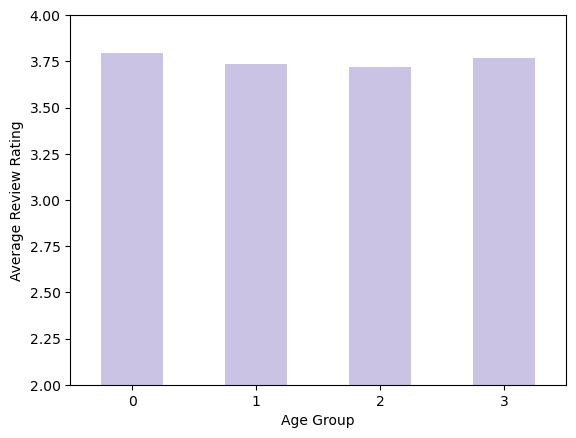

In [65]:
#Compare Age and Review Rating
age_vs_rating = shopping_trends_data.groupby('Age Group')['Review Rating'].mean().reset_index(name='Average')
print(age_vs_rating)

#Create Bar Chart
age_vs_rating.plot(kind='bar',color='#CBC3E3', legend=False)
plt.xlabel('Age Group')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=0)
plt.ylim(2, 4)
plt.show()

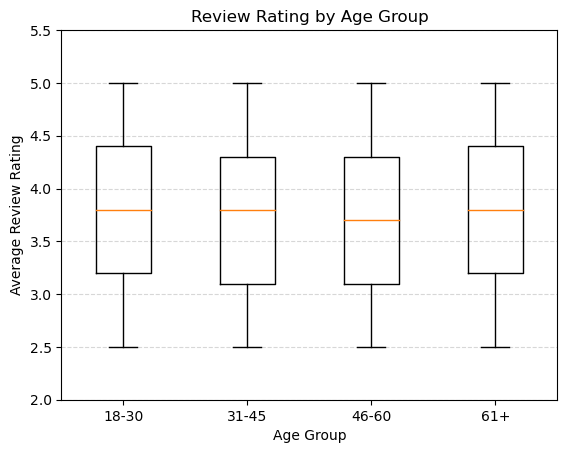

In [46]:
#Create Box and Whisker Plot for Age Range and Rating
age_and_rating = shopping_trends_data[['Age Group', 'Review Rating']].copy()
plt.boxplot([age_and_rating[age_and_rating['Age Group'] == '18-30']['Review Rating'],
             age_and_rating[age_and_rating['Age Group'] == '31-45']['Review Rating'],
             age_and_rating[age_and_rating['Age Group'] == '46-60']['Review Rating'],
             age_and_rating[age_and_rating['Age Group'] == '61+']['Review Rating']],
            labels=['18-30', '31-45', '46-60', '61+'])
plt.xlabel('Age Group')
plt.ylabel('Average Review Rating')
plt.title('Review Rating by Age Group')
plt.ylim(2,5.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


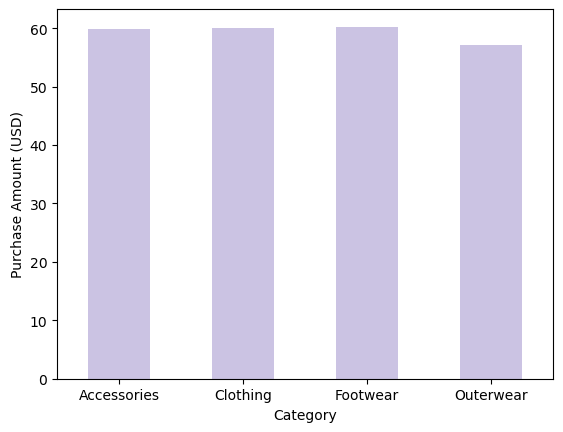

In [67]:
# avearge pricing per category
category_vs_rating = shopping_trends_data.groupby('Category')['Purchase Amount (USD)'].mean()
print(category_vs_rating)
#Create Bar Chart
category_vs_rating.plot(kind='bar',color='#CBC3E3')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=0)
plt.show()

<Axes: ylabel='Customer ID'>

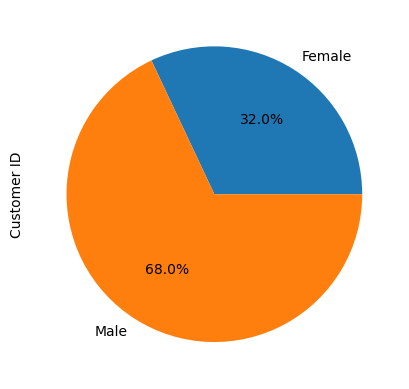

In [68]:
#percetnage of gender shopping
df_reset = shopping_trends_data.reset_index()
gender_percent= df_reset.groupby("Gender")["Customer ID"].nunique()
gender_percent.plot(kind = 'pie', autopct = '%1.1f%%')

Gender
Female    3.741426
Male      3.753959
Name: Review Rating, dtype: float64


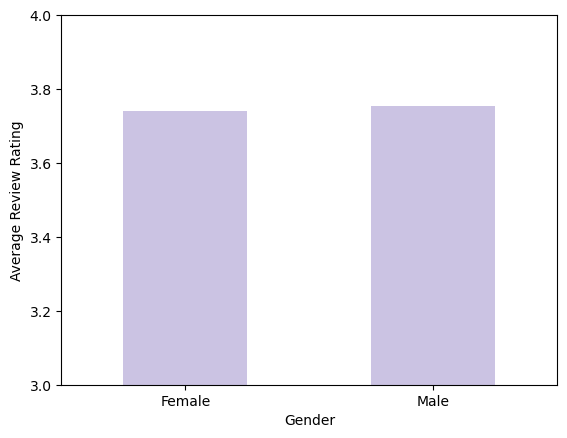

In [66]:
#Compare Gender and Review Rating
gender_vs_rating = shopping_trends_data.groupby('Gender')['Review Rating'].mean()
print(gender_vs_rating)
#Create Bar Chart
gender_vs_rating.plot(kind='bar',color='#CBC3E3')
plt.xlabel('Gender')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=0)
plt.ylim(3, 4)
plt.show()